# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and initial exploration

In [36]:
# Loading all 3 tables inside the spreadsheet
all_data = pd.read_excel("../data/Data.xlsx", sheet_name=['Charges', 'Other data', 'Churn'])

In [37]:
all_data['Charges'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   MonthlyCharges  7036 non-null   float64
 2   TotalCharges    7023 non-null   object 
dtypes: float64(1), object(2)
memory usage: 165.2+ KB


In [38]:
all_data['Other data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [39]:
all_data['Churn'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [40]:
# Joining all 3 tables together
df = pd.merge(all_data['Other data'], all_data['Churn'], how='right', on='customerID')
df = pd.merge(df, all_data['Charges'], how='left', on='customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Adjusting data types

In [43]:
target = 'Churn'
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_vars = [i for i in df.columns if i not in numerical_vars + [target, 'customerID']]

In [46]:
# cleaning possible blank strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.strip()
    df[col] = df[col].replace('', np.nan)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
# tenure and MonthlyCharges have correct dtype. Only TotalCharges is wrong
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
df.to_csv('../data/data_joined.csv', index=False, encoding='utf-8')

## Exploratory Data Analysis

In [61]:
df = pd.read_csv('../data/data_joined.csv')

<Axes: xlabel='TotalCharges', ylabel='Count'>

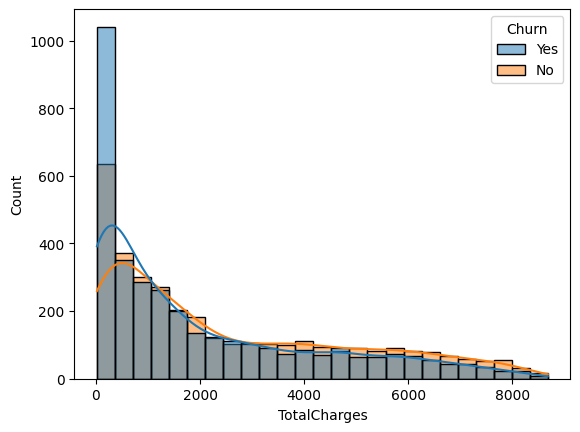

In [51]:
# Distribution of total charges for people who churned and didn't churn
sns.histplot(df, x='TotalCharges', hue='Churn', kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

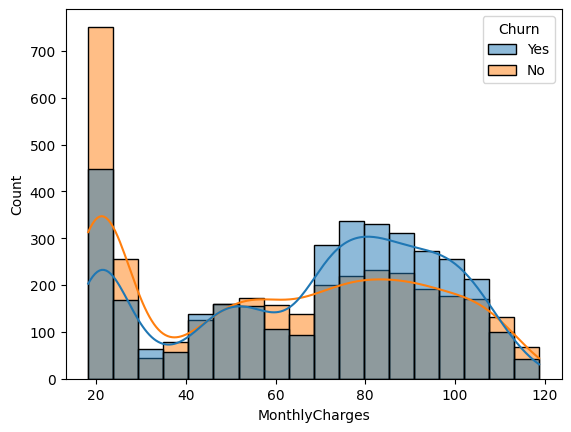

In [52]:
# The same for monthly charges distribution
sns.histplot(df, x='MonthlyCharges', hue='Churn', kde=True)

<Axes: xlabel='tenure', ylabel='Count'>

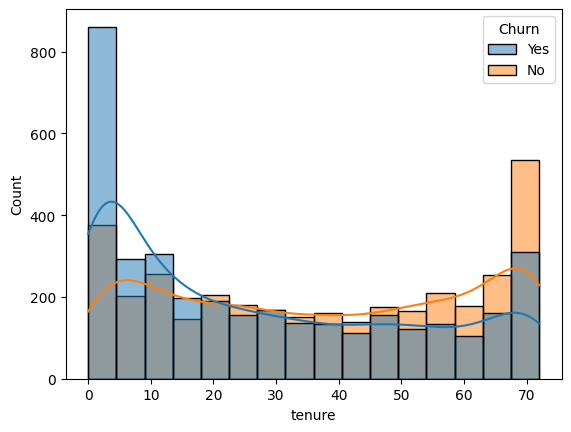

In [53]:
sns.histplot(df, x='tenure', hue='Churn', kde=True)

<Axes: xlabel='TotalCharges', ylabel='tenure'>

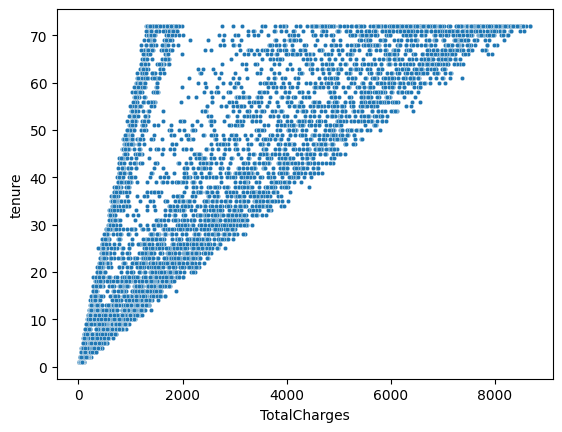

In [99]:
sns.scatterplot(df, x='TotalCharges', y='tenure', s=10)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

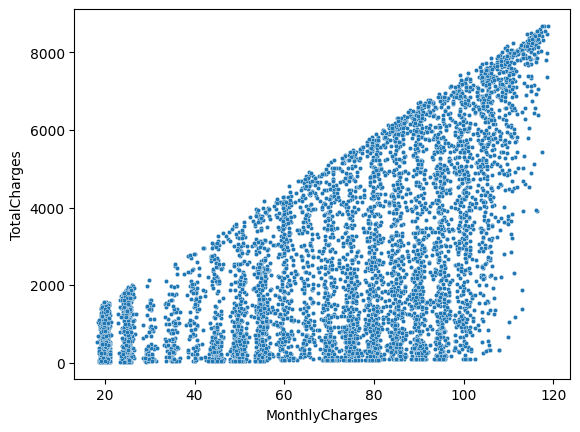

In [103]:
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', s=10)

<Axes: >

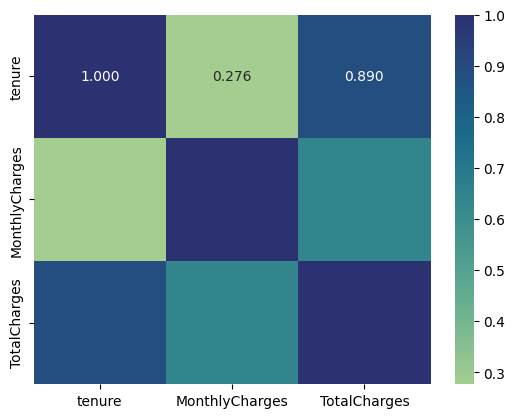

In [104]:
sns.heatmap(df[numerical_vars].corr(method='spearman'), annot=True, fmt='.3f', cmap='crest')

<Axes: xlabel='tenure', ylabel='Churn'>

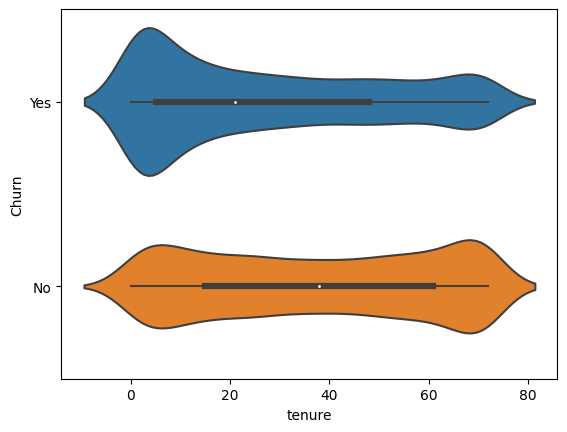

In [57]:
sns.violinplot(df, x='tenure', y='Churn', fill=False)

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

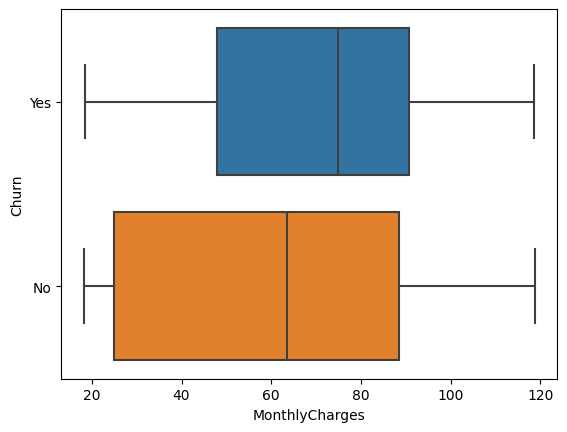

In [58]:
sns.boxplot(df, x='MonthlyCharges', y='Churn')

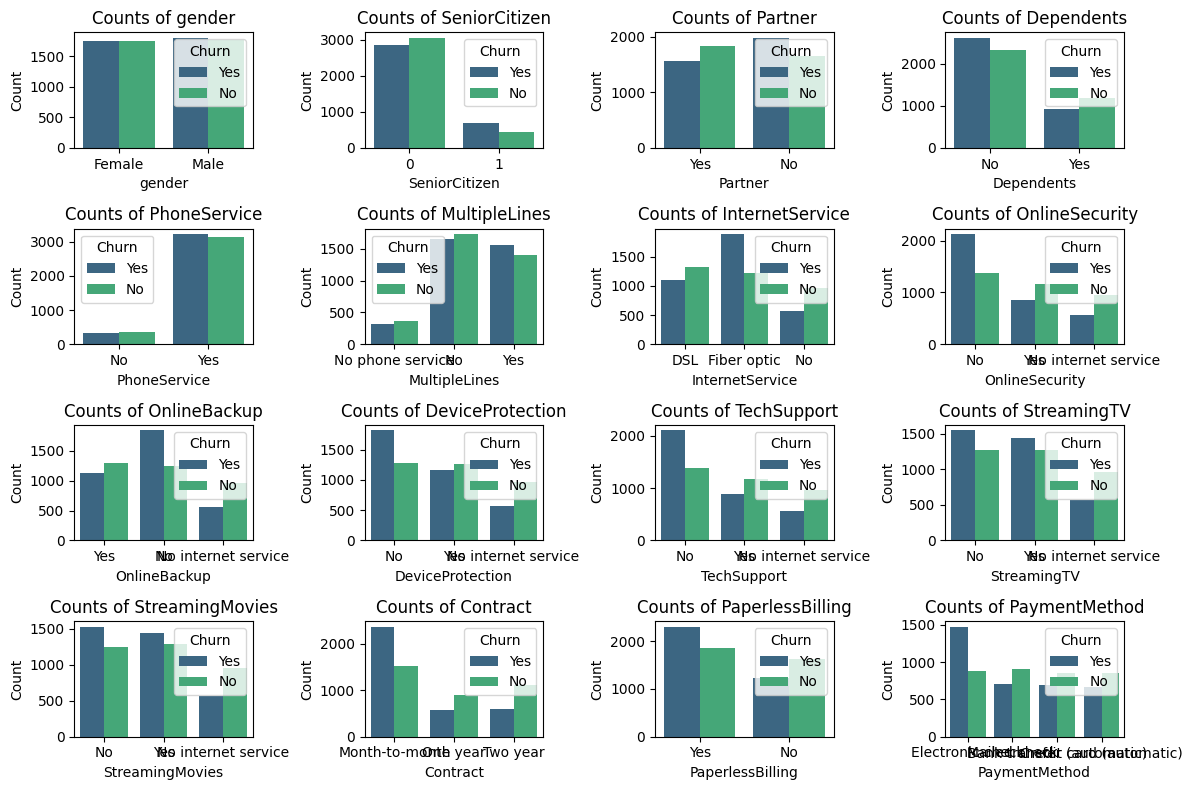

In [59]:
plt.figure(figsize=(12, 8))

# Create subplots
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, palette='viridis', hue='Churn')
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the plots above, we can say there are no variables with a single category.

## Data cleaning

In [176]:
# df = pd.read_csv('../data/data_joined.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Looking for low-populated variables and imputing 

In [64]:
# Missing value rate
df.isnull().sum()/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
Churn               0.000000
MonthlyCharges      0.000994
TotalCharges        0.004402
dtype: float64

Let's divide the predictor variables and the target variables in order to impute the data. We'll also do the train-test split.

In [65]:
from sklearn.model_selection import train_test_split
X, y = df[numerical_vars + categorical_vars], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
X_train[['MonthlyCharges_imputed', 'TotalCharges_imputed']] = median_imputer.fit_transform(X=X_train[['MonthlyCharges', 'TotalCharges']])
X_test[['MonthlyCharges_imputed', 'TotalCharges_imputed']] = median_imputer.fit_transform(X=X_test[['MonthlyCharges', 'TotalCharges']])

In [67]:
# Comparing distributions between original and imputed vars
from scipy.stats import ks_2samp
print(f"K-S test results for train data:")
print(ks_2samp(X_train['MonthlyCharges'].dropna(), X_train['MonthlyCharges_imputed']))
print(ks_2samp(X_train['TotalCharges'].dropna(), X_train['TotalCharges_imputed']))
print(f"K-S test results for test data:")
print(ks_2samp(X_test['MonthlyCharges'].dropna(), X_test['MonthlyCharges_imputed']))
print(ks_2samp(X_test['TotalCharges'].dropna(), X_test['TotalCharges_imputed']))

K-S test results for train data:
KstestResult(statistic=0.0005319136857928523, pvalue=1.0, statistic_location=70.4, statistic_sign=1)
KstestResult(statistic=0.002395738781566401, pvalue=0.999999999999999, statistic_location=1396.25, statistic_sign=1)
K-S test results for test data:
KstestResult(statistic=0.0003543575391960772, pvalue=1.0, statistic_location=69.8, statistic_sign=-1)
KstestResult(statistic=0.0014184361337512535, pvalue=1.0, statistic_location=1391.15, statistic_sign=1)


Imputed variables seem to have the same distribution as original ones according to the K-S test. So, we can use them instead:

In [68]:
X_train.drop(columns=['MonthlyCharges', 'TotalCharges'], inplace=True)
X_test.drop(columns=['MonthlyCharges', 'TotalCharges'], inplace=True)

In [69]:
# renaming imputed cols
X_train.rename(columns={'MonthlyCharges_imputed':'MonthlyCharges', 'TotalCharges_imputed':'TotalCharges'}, inplace=True)
X_test.rename(columns={'MonthlyCharges_imputed':'MonthlyCharges', 'TotalCharges_imputed':'TotalCharges'}, inplace=True)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object

In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 1093 to 1250
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            1409 non-null   int64  
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1409 non-null   objec

### Detecting outliers

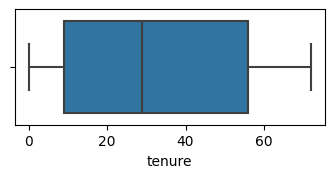

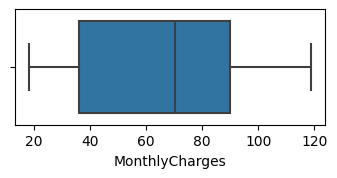

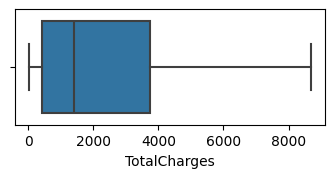

In [72]:
# For training set
for var in numerical_vars:
    plt.figure(figsize=(4, 1.5))
    sns.boxplot(X_train, x=var)
    plt.show()

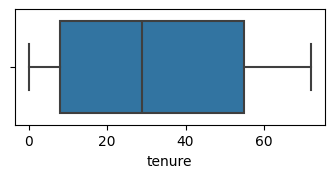

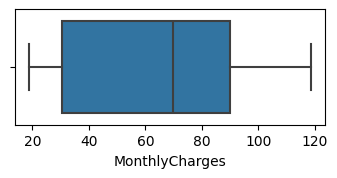

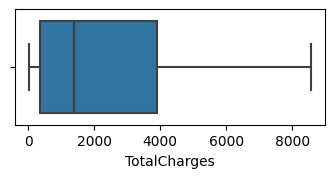

In [73]:
# For testing set
for var in numerical_vars:
    plt.figure(figsize=(4, 1.5))
    sns.boxplot(X_test, x=var)
    plt.show()

The numerical variables in train and test sets do not show any outliers in the boxplots. So, according to the IQR criterion there are no outliers to remove.

## Saving final data

In [74]:
# predictors
X_train.to_csv('../data/x_train.csv', index=False, encoding='utf-8')
X_test.to_csv('../data/x_test.csv', index=False)

In [78]:
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)